<a href="https://colab.research.google.com/github/agarwalpratik/aiml/blob/main/DecisionRegionExplanationDemoAnd_SVM_Demo_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv('50_Startups.csv')

In [25]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
features = data.iloc[:,0:4].values
finalLabels = data.iloc[:,4].values

In [31]:
from sklearn.preprocessing import OneHotEncoder
oheForstate = OneHotEncoder(sparse_output=False)
oheForstate.fit(features[:,[3]])
dummyVariables = oheForstate.transform(features[:,[3]]).astype(int)

In [32]:
finalFeatures = np.concatenate([dummyVariables,features[:,[0,1,2]]] , axis = 1)
finalFeatures

array([[0, 0, 1, 165349.2, 136897.8, 471784.1],
       [1, 0, 0, 162597.7, 151377.59, 443898.53],
       [0, 1, 0, 153441.51, 101145.55, 407934.54],
       [0, 0, 1, 144372.41, 118671.85, 383199.62],
       [0, 1, 0, 142107.34, 91391.77, 366168.42],
       [0, 0, 1, 131876.9, 99814.71, 362861.36],
       [1, 0, 0, 134615.46, 147198.87, 127716.82],
       [0, 1, 0, 130298.13, 145530.06, 323876.68],
       [0, 0, 1, 120542.52, 148718.95, 311613.29],
       [1, 0, 0, 123334.88, 108679.17, 304981.62],
       [0, 1, 0, 101913.08, 110594.11, 229160.95],
       [1, 0, 0, 100671.96, 91790.61, 249744.55],
       [0, 1, 0, 93863.75, 127320.38, 249839.44],
       [1, 0, 0, 91992.39, 135495.07, 252664.93],
       [0, 1, 0, 119943.24, 156547.42, 256512.92],
       [0, 0, 1, 114523.61, 122616.84, 261776.23],
       [1, 0, 0, 78013.11, 121597.55, 264346.06],
       [0, 0, 1, 94657.16, 145077.58, 282574.31],
       [0, 1, 0, 91749.16, 114175.79, 294919.57],
       [0, 0, 1, 86419.7, 153514.11, 0.0],
 

In [38]:
from sklearn.svm import SVR
model2 = SVR(kernel="linear", gamma=0)
model2.fit(finalFeatures,finalLabels)

SVR(gamma=0, kernel='linear')

In [34]:
from sklearn.svm import SVR
model3 = SVR(kernel="rbf")
model3.fit(finalFeatures,finalLabels)

SVR()

In [35]:
from sklearn.svm import SVR
model4 = SVR(kernel="poly")
model4.fit(finalFeatures,finalLabels)

SVR(kernel='poly')

In [39]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model2)

ValueError: y must be an integer array. Found float64. Try passing the array as y.astype(np.int_)

In [36]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model3)

ValueError: y must be an integer array. Found float64. Try passing the array as y.astype(np.int_)

<Axes: >

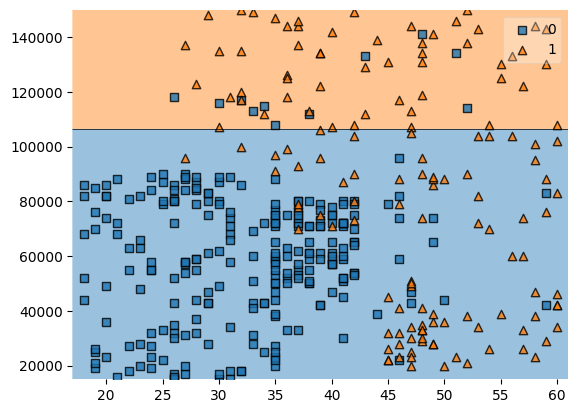

In [17]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model4)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(finalLabels, model2.predict(finalFeatures))

ValueError: continuous is not supported

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(finalLabels, model3.predict(finalFeatures))

array([[257,   0],
       [  2, 141]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(finalLabels, model4.predict(finalFeatures))